In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Paso 1: Carga e inspección de datos

df = pd.read_csv("Logistics_shipments_dataset.csv")

In [85]:
df.head()

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,9
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3


In [86]:
#primeras filas
print(df.head())

#estructura del dataset
print(df.info())

  Shipment_ID Origin_Warehouse    Destination Carrier Shipment_Date  \
0     SH10000    Warehouse_MIA  San Francisco     UPS    2023-10-02   
1     SH10001    Warehouse_MIA        Atlanta     DHL    2023-12-06   
2     SH10002     Warehouse_LA        Houston     DHL    2023-09-18   
3     SH10003    Warehouse_BOS        Seattle  OnTrac    2023-01-26   
4     SH10004     Warehouse_SF         Dallas  OnTrac    2023-06-03   

  Delivery_Date  Weight_kg    Cost     Status  Distance_miles  Transit_Days  
0    2023-10-04       25.7   67.46  Delivered             291             2  
1    2023-12-09       38.9  268.85  Delivered            1225             3  
2    2023-09-20       37.2   74.35  Delivered             220             2  
3    2023-02-04       42.6  187.04  Delivered            1156             9  
4    2023-06-06        7.9  120.01  Delivered            1017             3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns)

In [87]:
#estructura del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shipment_ID       2000 non-null   object 
 1   Origin_Warehouse  2000 non-null   object 
 2   Destination       2000 non-null   object 
 3   Carrier           2000 non-null   object 
 4   Shipment_Date     2000 non-null   object 
 5   Delivery_Date     1968 non-null   object 
 6   Weight_kg         2000 non-null   float64
 7   Cost              1959 non-null   float64
 8   Status            2000 non-null   object 
 9   Distance_miles    2000 non-null   int64  
 10  Transit_Days      2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB
None


In [88]:
#valores faltantes
print(df.isnull().sum())

Shipment_ID          0
Origin_Warehouse     0
Destination          0
Carrier              0
Shipment_Date        0
Delivery_Date       32
Weight_kg            0
Cost                41
Status               0
Distance_miles       0
Transit_Days         0
dtype: int64


In [89]:
# Estadísticas básicas de las columnas numéricas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Weight_kg,2000.0,30.184800,124.967053,0.00,12.30,20.70,33.925,5404.20
Cost,1959.0,205.161598,222.586082,17.89,117.71,196.42,272.115,6562.21
Distance_miles,2000.0,1275.868000,691.382829,101.00,690.25,1262.50,1867.250,2499.00
Transit_Days,2000.0,4.182500,1.837902,1.00,3.00,4.00,5.000,12.00


In [90]:
missing_values = pd.DataFrame(
    {
        "missing_values_percentage" : df.isnull().sum() * 100/ df.shape[0] ,
        "total_values" : df.isnull().sum()        
    }
)
missing_values.sort_values(by="missing_values_percentage", ascending=False)

,missing_values_percentage,total_values
Cost,2.05,41
Delivery_Date,1.60,32
Shipment_ID,0.00,0
Destination,0.00,0
Origin_Warehouse,0.00,0
Shipment_Date,0.00,0
Carrier,0.00,0
Weight_kg,0.00,0
Status,0.00,0
Distance_miles,0.00,0


In [ ]:
#Puntos a tener en cuanta 
#1)Predecir retrasos en la entrega usado los dias y distancias 

#2)Predecir Cost en función de: Weight_kg|Distance_miles|Transit_Days

#3)Dividir la 

#1)Optimizar el precio al elegir un carrier basado en el costo y el tiempo --- streamlit

In [92]:
#1)Predecir retrasos en la entrega usado los dias y distancias 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shipment_ID       2000 non-null   object 
 1   Origin_Warehouse  2000 non-null   object 
 2   Destination       2000 non-null   object 
 3   Carrier           2000 non-null   object 
 4   Shipment_Date     2000 non-null   object 
 5   Delivery_Date     1968 non-null   object 
 6   Weight_kg         2000 non-null   float64
 7   Cost              1959 non-null   float64
 8   Status            2000 non-null   object 
 9   Distance_miles    2000 non-null   int64  
 10  Transit_Days      2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB
None


In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns  # Necesario para el gráfico de violín


In [ ]:
# Paso 1: Carga los datos del archivo CSV
#==================================================
#==================================================

try:
    df = pd.read_csv('Logistics_shipments_dataset.csv', na_values=["NA", "N/A", "", " ", "missing"])
    print("✅Datos cargados correctamente")
    print(f"✅Dimension: {df.shape}")
    print(f"✅10 columnas: {list(df.columns)[:10]}")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Informacion tecnica del dataset
df.info()

print("✅VALORES DE LAS COLMNAS QUE VAMOS A USAR✅")
print(df[['Distance_miles', 'Transit_Days']])

✅Datos cargados correctamente
✅Dimension: (2000, 1)
✅11 columnas: ['Shipment_ID;Origin_Warehouse;Destination;Carrier;Shipment_Date;Delivery_Date;Weight_kg;Cost;Status;Distance_miles;Transit_Days']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                          --------------  ----- 
 0   Shipment_ID;Origin_Warehouse;Destination;Carrier;Shipment_Date;Delivery_Date;Weight_kg;Cost;Status;Distance_miles;Transit_Days  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB
✅VALORES DE LAS COLMNAS QUE VAMOS A USAR✅


KeyError: "None of [Index(['Distance_miles', 'Transit_Days'], dtype='object')] are in the [columns]"

In [95]:
# Paso 2: Limpieza de datos
#==================================================
#==================================================

# Convertir columnas a numéricas
df['Distance_miles'] = pd.to_numeric(df['Distance_miles'], errors='coerce')
df['Transit_Days'] = pd.to_numeric(df['Transit_Days'], errors='coerce')

print(f"\n1. Tipo de dato de la distancia: {df['Distance_miles'].dtype} ✅")
print(f"   Tipo de dato de la dias de transito: {df['Transit_Days'].dtype} ✅")

# Vemos si tiene espacios en balncos la dos colmnas en las que trabajamos
valores_en_balnco = df[df['Distance_miles'] == ' ']
print(f"\n2. Filas con espacios en blanco de las dos colmnas:{len(valores_en_balnco)}")

valores_en_balnco = df[df['Transit_Days'] == ' ']
print(f"   Filas con espacios en blanco de las dos columnas:{len(valores_en_balnco)}")

# Eliminar filas con valores faltantes
df = df.dropna(subset=['Distance_miles', 'Transit_Days'])
print("\n3. Eliminamos los valores faltantes de las columnas ✅ ")

# Filtrar por estados válidos
df = df[df['Status'].isin(['Delivered', 'Delayed'])]
print("\n4. Filtramos usando los valores Delivered y Delayed ✅ ")


1. Tipo de dato de la distancia: int64 ✅
   Tipo de dato de la dias de transito: int64 ✅

2. Filas con espacios en blanco de las dos colmnas:0
   Filas con espacios en blanco de las dos columnas:0

3. Eliminamos los valores faltantes de las columnas ✅ 

4. Filtramos usando los valores Delivered y Delayed ✅ 


In [96]:
#AHORA VAMOS A ENTRENAR UN MODELO DE REGRESION LINEAL PARA PREDECIR EL TIEMPO DE DEMORA EN CADA CARRIER

# Paso 3: Preparación de datos para el modelo
#==================================================
#==================================================

X = df[['Distance_miles']]  # Característica: distancia  X: Variable independiente (lo que usamos para predecir)
y = df['Transit_Days']      # Objetivo: días de tránsito Y: Variable dependiente (lo que queremos predecir)

# Divide los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Paso 4: Entrena un modelo de regresión lineal. La fórmula que aprenderá es: y = mx + b
#==================================================#==================================================
#==================================================#==================================================

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [98]:
# Paso 5: Predicciones en el conjunto de prueba
#==================================================
#==================================================
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)                                 # Calcula el Error Cuadrático Medio (MSE) COMPARA y_test (valores reales) VS y_pred (predicciones)

print(f'\n1.Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'\n2.Coeficiente (pendiente): {model.coef_[0]:.4f} (días por milla)') # Aproximadamente: +1 día cada 28 millas (1/0.0356)
print(f'\n3.Intercepto: {model.intercept_:.2f} (días base)')                 #Incluye: tiempo de procesamiento, carga/descarga, etc.


1.Error Cuadrático Medio (MSE): 1.35

2.Coeficiente (pendiente): 0.0020 (días por milla)

3.Intercepto: 1.61 (días base)


In [99]:
# Paso 6: Calcula el retraso para todo el DataFrame
#==================================================
#==================================================
df['Predicted_Days'] = model.predict(df[['Distance_miles']])
# Predicted_Days: Columna nueva con el tiempo esperado según el modelo
# Model.predict(): Aplica el modelo a TODAS las distancias del DataFrame
# Esto nos dice ¿Cuántos días debería tardar cada envío?

df['Delay_Days'] = df['Transit_Days'] - df['Predicted_Days']
#    Retraso     =      Tiempo Real   -     Tiempo Esperado

# Muestra algunos ejemplos
print('\nEjemplos de retrasos calculados:')
print(df[['Shipment_ID', 'Distance_miles', 'Transit_Days', 'Predicted_Days', 'Delay_Days', 'Status']].head(10))


Ejemplos de retrasos calculados:
  Shipment_ID  Distance_miles  Transit_Days  Predicted_Days  Delay_Days  \
0     SH10000             291             2        2.202013   -0.202013   
1     SH10001            1225             3        4.107594   -1.107594   
2     SH10002             220             2        2.057156   -0.057156   
3     SH10003            1156             9        3.966818    5.033182   
4     SH10004            1017             3        3.683225   -0.683225   
5     SH10005             898             3        3.440437   -0.440437   
6     SH10006            1522             4        4.713545   -0.713545   
7     SH10007            2013             9        5.715301    3.284699   
8     SH10008            2072             7        5.835675    1.164325   
9     SH10009             214             2        2.044915   -0.044915   

      Status  
0  Delivered  
1  Delivered  
2  Delivered  
3  Delivered  
4  Delivered  
5  Delivered  
6  Delivered  
7  Delivered  
8  De

In [102]:
# Paso 7: Predicción para un nuevo envío
#==================================================
#==================================================

new_distance = 1000
# Aquí defines la distancia de un nuevo envío que quieres predecir

predicted_days = model.predict(np.array([[new_distance]]))[0]
#Model.predict(): Aplica la fórmula aprendida: y = m*x + b
#El doble corchete [[ ]] es crucial porque el modelo espera un DataFrame/array 2D

print(f'\nPredicción: Para una distancia de {new_distance} millas, los días de tránsito esperados son {predicted_days:.2f}')


Predicción: Para una distancia de 1000 millas, los días de tránsito esperados son 3.65


c:\Users\Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\Pc\AppData\Local\Temp\ipykernel_12136\900720573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Carrier', y='Delay_Days', data=df, palette='muted')


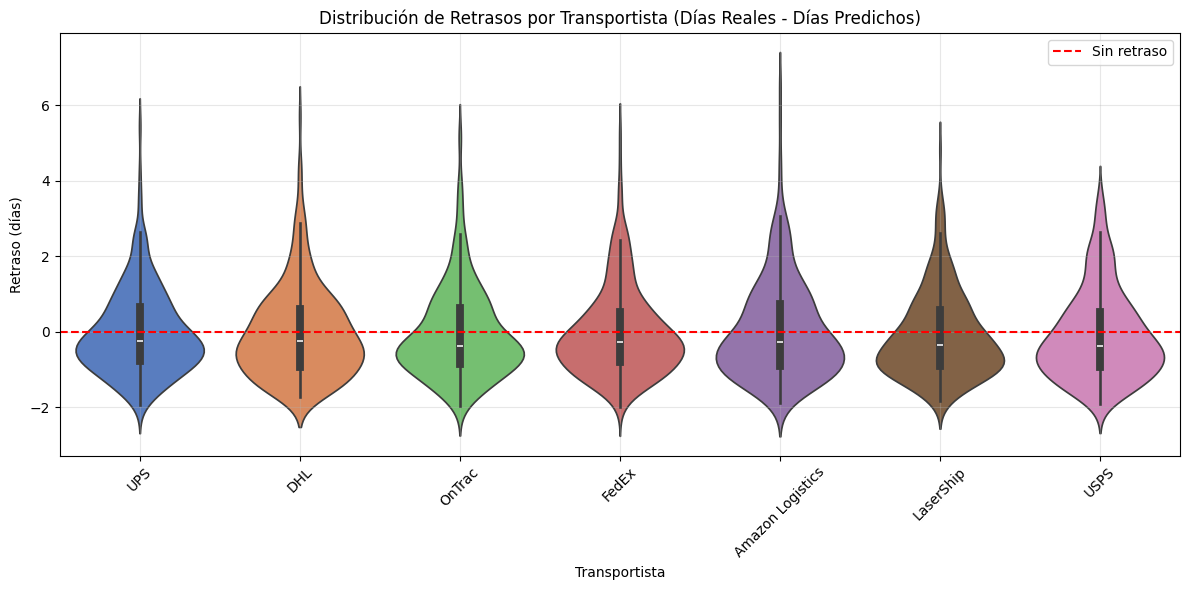


Retraso promedio en envíos "Delayed": 0.03 días
Retraso promedio en envíos no "Delayed": -0.04 días


In [ ]:
# Paso 8: Visualización - Gráfico de violín de los retrasos por Carrier
#==================================================#==================================================
#==================================================#==================================================

plt.figure(figsize=(12, 6))
sns.violinplot(x='Carrier', y='Delay_Days', data=df, palette='muted')
plt.title('Distribución de Retrasos por Transportista (Días Reales - Días Predichos)')
plt.xlabel('Transportista')
plt.ylabel('Retraso (días)')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', label='Sin retraso')
plt.legend()
plt.xticks(rotation=45)  # Rota las etiquetas si hay muchos transportistas
plt.tight_layout()
plt.show()

# Análisis adicional
delayed_actual = df[df['Status'] == 'Delayed']['Delay_Days'].mean()
no_delay_actual = df[df['Status'] != 'Delayed']['Delay_Days'].mean()
print(f'\nRetraso promedio en envíos "Delayed": {delayed_actual:.2f} días')
print(f'Retraso promedio en envíos no "Delayed": {no_delay_actual:.2f} días')

In [ ]:
#Paso 9: Interpretacion del grafico 
#==================================================#==================================================
#==================================================#==================================================

#Forma del violín: Distribución de retrasos

#Posición vertical: Retraso promedio (más alto = peor)

#Anchura: Cantidad de envíos con ese retraso

#Extensión: Rango de retrasos (valores extremos)

In [113]:
#==================================================#==================================================#==================================================#======================================

#2)Predecir Cost en función de: Weight_kg|Distance_miles|Transit_Days

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [136]:
# Cargar datos
df = pd.read_csv('logistics_shipments_dataset.csv')

# Ver estructura
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                          --------------  ----- 
 0   Shipment_ID;Origin_Warehouse;Destination;Carrier;Shipment_Date;Delivery_Date;Weight_kg;Cost;Status;Distance_miles;Transit_Days  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB
None
Shipment_ID;Origin_Warehouse;Destination;Carrier;Shipment_Date;Delivery_Date;Weight_kg;Cost;Status;Distance_miles;Transit_Days    0
dtype: int64


In [108]:
# Eliminar filas con valores nulos en columnas clave (si las hay)
df = df.dropna(subset=['Cost', 'Weight_kg', 'Distance_miles', 'Transit_Days'])

# Convertir fechas si es necesario (opcional)
df['Shipment_Date'] = pd.to_datetime(df['Shipment_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])

In [112]:
# Variables independientes y dependiente
X1 = df[['Weight_kg', 'Distance_miles', 'Transit_Days']]
y1 = df['Cost']

# Dividir en train y test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [114]:
# Entrenar modelo
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Predecir
y1_pred = model1.predict(X1_test)

# Métricas
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

print("Modelo 1 - Predicción de Costo")
print(f"MSE: {mse1:.2f}")
print(f"R²: {r2_1:.2f}")

Modelo 1 - Predicción de Costo
MSE: 101554.59
R²: 0.09


Text(0.5, 1.0, 'Modelo 1: Costo')

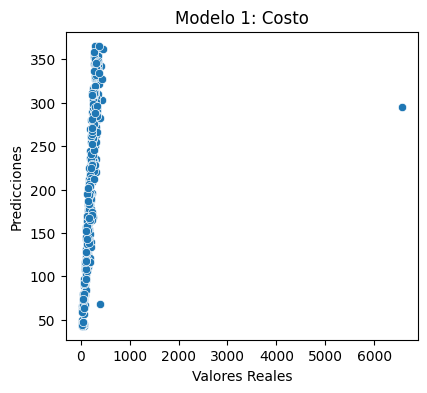

In [ ]:
#Visualización de Resultados 
# Gráfico

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y1_test, y=y1_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Modelo 1: Costo")

In [ ]:
#Interpretación de Coeficientes

coef1 = model1.coef_
intercept1 = model1.intercept_
print("Modelo 1 - Coeficientes:")
print(f"Intercepto: {intercept1:.2f}")
for i, col in enumerate(X1.columns):
    print(f"{col}: {coef1[i]:.2f}")

#==================================
#El diagrama de dispersión compara los valores reales de costo (eje X) con los valores predichos por el modelo (eje Y).
#.Si el modelo fuera perfecto, todos los puntos se ubicarían sobre la diagonal (la línea y = x).
#.Cuanto más cercanos estén los puntos a esa diagonal, mejor es la capacidad predictiva del modelo.
#.Una dispersión amplia o puntos alejados indican errores de predicción en ciertos casos, lo cual puede estar relacionado con la variabilidad de los datos o la necesidad de ajustar el modelo.

Modelo 1 - Coeficientes:
Intercepto: 26.55
Weight_kg: 0.03
Distance_miles: 0.14
Transit_Days: 0.09


In [120]:
#==================================================#==================================================#==================================================#======================================

#3)Predecir Cost en función de: Weight_kg|Distance_miles|Transit_Days

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [128]:

# Cargar dataset
import pandas as pd

df = pd.read_csv("logistics_shipments_dataset.csv", sep=";")
print(df.head())   # para ver las primeras filas
print(df.columns)  # para confirmar columnas


  Shipment_ID Origin_Warehouse    Destination Carrier Shipment_Date  \
0     SH10000    Warehouse_MIA  San Francisco     UPS     2/10/2023   
1     SH10001    Warehouse_MIA        Atlanta     DHL     6/12/2023   
2     SH10002     Warehouse_LA        Houston     DHL     18/9/2023   
3     SH10003    Warehouse_BOS        Seattle  OnTrac     26/1/2023   
4     SH10004     Warehouse_SF         Dallas  OnTrac      3/6/2023   

  Delivery_Date  Weight_kg    Cost     Status  Distance_miles  Transit_Days  
0     4/10/2023       25.7   67.46  Delivered             291             2  
1     9/12/2023       38.9  268.85  Delivered            1225             3  
2     20/9/2023       37.2   74.35  Delivered             220             2  
3      4/2/2023       42.6  187.04  Delivered            1156             9  
4      6/6/2023        7.9  120.01  Delivered            1017             3  
Index(['Shipment_ID', 'Origin_Warehouse', 'Destination', 'Carrier',
       'Shipment_Date', 'Delivery_Dat

In [129]:
# elimina espacios
df.columns = df.columns.str.strip()   
print(df.columns.tolist())


['Shipment_ID', 'Origin_Warehouse', 'Destination', 'Carrier', 'Shipment_Date', 'Delivery_Date', 'Weight_kg', 'Cost', 'Status', 'Distance_miles', 'Transit_Days']


In [ ]:
# 🔹 Preprocesamiento
df = df.dropna(subset=["Cost", "Weight_kg", "Distance_miles", "Transit_Days"])


In [131]:
# Crear variable objetivo: caro vs barato (usamos la mediana como corte)
umbral = df["Cost"].median()
df["Clase_Costo"] = df["Cost"].apply(lambda x: "Caro" if x > umbral else "Barato")


In [133]:

# Features y target
X = df[["Weight_kg", "Distance_miles", "Transit_Days"]]
y = df["Clase_Costo"]

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.9260204081632653

Reporte de Clasificación:
               precision    recall  f1-score   support

      Barato       0.93      0.92      0.93       199
        Caro       0.92      0.93      0.93       193

    accuracy                           0.93       392
   macro avg       0.93      0.93      0.93       392
weighted avg       0.93      0.93      0.93       392



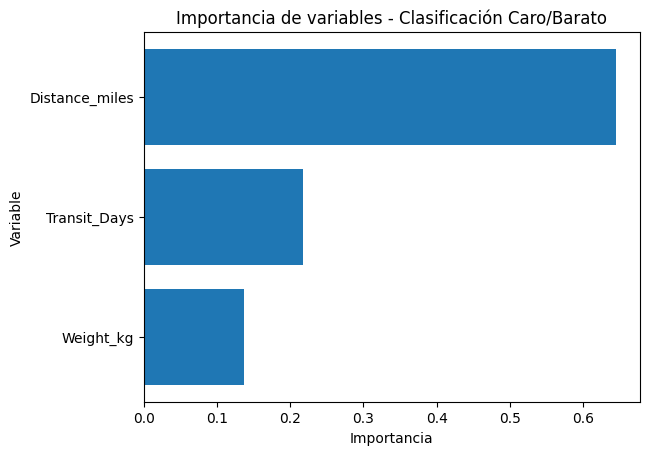

In [137]:

# 🔹 Importancia de variables
importancias = clf.feature_importances_
features = X.columns
indices = np.argsort(importancias)
sorted_importancias = [importancias[i]for i in indices]
sorted_features = [features[i]for i in indices]

plt.barh(sorted_features, sorted_importancias)
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de variables - Clasificación Caro/Barato")
plt.show()


In [ ]:
#El gráfico de importancia te deja explicar qué pesa más en el costo:
#¿El peso del envío?
#¿La distancia recorrida?
#¿Los días de tránsito?